In [13]:
from sklearn.impute import KNNImputer
import pandas as pd

# Sample healthcare dataset with missing values
data = pd.DataFrame({
    'Patient_ID': [101, 102, 103],
    'Blood_Pressure': [120, None, 130]  # Missing value for one patient
})

# Use KNN Imputer to fill missing values
imputer = KNNImputer(n_neighbors=2)
data[['Blood_Pressure']] = imputer.fit_transform(data[['Blood_Pressure']])

# Corrected print statement
print("Data after imputation:\n", data)


Data after imputation:
    Patient_ID  Blood_Pressure
0         101           120.0
1         102           125.0
2         103           130.0


In [15]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Sample healthcare dataset (e.g., patient glucose levels)
glucose_levels = np.array([[90], [95], [100], [300], [105]])  # 300 is an outlier

# Detecting outliers using Isolation Forest
clf = IsolationForest(contamination=0.2, random_state=42)
outliers = clf.fit_predict(glucose_levels)

print("Outlier labels:", outliers)  # -1 for outliers, 1 for normal values


Outlier labels: [ 1  1  1 -1  1]


In [17]:
from imblearn.over_sampling import SMOTE

# Sample healthcare dataset (e.g., disease diagnosis)
X = [[120], [130], [140], [180], [190]]  # Blood pressure values
y = [0, 0, 0, 1, 1]  # 0 = No Hypertension, 1 = Hypertension (Minority Class)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print resampled class distribution
print("Resampled class distribution:", 
      {label: sum(1 for i in y_resampled if i == label) for label in set(y_resampled)})


Resampled class distribution: {0: 3, 1: 3}


In [7]:
#2.1 Baseline Model with Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

Accuracy: 1.00


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



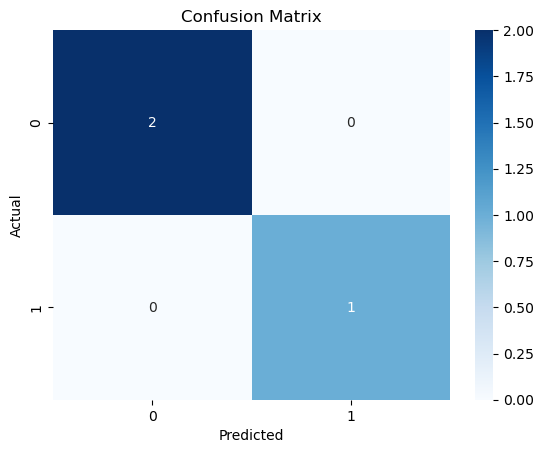

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (Blood Sugar Levels & Diabetes Diagnosis)
X = [[85], [90], [95], [100], [105], [200], [210], [220]]  # More data points
y = [0, 0, 0, 0, 0, 1, 1, 1]  # Balanced classes

# Balance data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Ensure test set contains both classes
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Train Random Forest Model
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show confusion matrix with explicit labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


